In [1]:
%matplotlib inline
import numpy as np

from scipy.stats import linregress
from scipy.stats import gmean
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.colors
import seaborn
import pandas as pd

In [2]:
# Load the data from Excel, remove data points that are not comparable.
raw_kin_df = pd.read_excel('../data/01152018rubisco_kinetics.xlsx', index_col=0)
wt_only_df = raw_kin_df[raw_kin_df.mutant == False]

# Some measurements are made at much higher temps and are not comparable.
# TODO: collect pH of measurements so we can restrict to similar range
high_T = wt_only_df.Temp_C > 30
wt_only_df = wt_only_df.loc[np.logical_not(high_T)]

# Filtered DataFrame used for most plots below.
# Only variants with all the data
kin_df = wt_only_df.copy()
has_KMs = np.logical_and(np.isfinite(kin_df.Kc), np.isfinite(kin_df.Ko))
has_kcats = np.logical_and(np.isfinite(kin_df.Vc), np.isfinite(kin_df.Vo))
has_kons = np.logical_and(np.isfinite(kin_df.kon_C), np.isfinite(kin_df.kon_O))
has_all = np.logical_and(np.logical_and(has_KMs, has_kcats), has_kons)
kin_df = kin_df[has_all]

# Want to split data in various ways
# Savir vs. Non-Savir (mostly new) data
savir_df = wt_only_df[wt_only_df.savir]
nonsavir_df = wt_only_df[wt_only_df.savir == False]

# Group by RuBisCO form
grouped_form = wt_only_df.groupby('form_text')

# Markers we use for plotting below.
markers = 'o><^dsphH*'

cnames = ["windows blue", "amber", "greyish brown", "dusty purple", "dusty teal", "dusty red", ]
named_colors = seaborn.xkcd_palette(cnames)

In [3]:
print wt_only_df.shape[0], 'total WT RuBisCOs'
print kin_df.shape[0], 'RuBisCOs with all core kinetic data measured'

158 total WT RuBisCOs
136 RuBisCOs with all core kinetic data measured


0.25 3.4 13.0
3.3 20.7 750.0
0.03 0.97675891685 3.041666667
2.5 543.0 2030.0


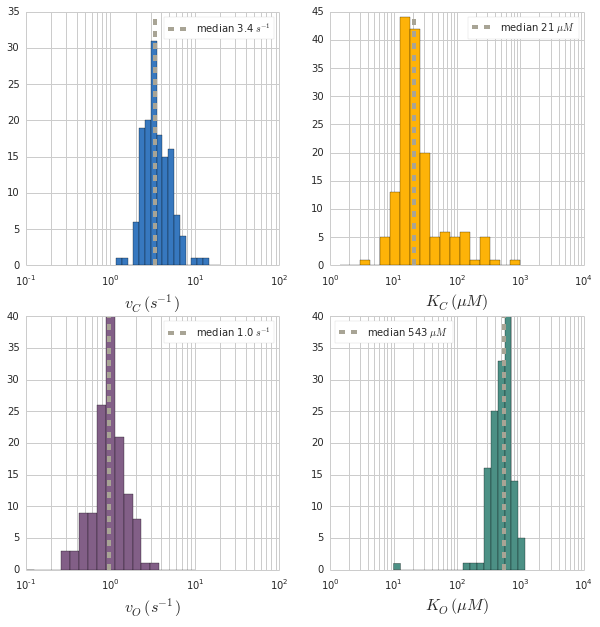

In [4]:
# Histograms
figure = plt.figure(figsize=(10,10))
seaborn.set_style('whitegrid')

plt.subplot(221)
vCs = wt_only_df.Vc
mask = ~np.isnan(vCs)
vCs = vCs[mask]
median_vC = np.median(vCs)
print np.min(vCs), median_vC, np.max(vCs)

plt.xscale('log')
bins = np.logspace(0, np.log10(20), 20)
plt.hist(vCs, bins=bins, color=named_colors[0])

label = 'median %.1f $s^{-1}$' % median_vC
plt.axvline(median_vC, color=seaborn.xkcd_rgb['greyish'], ls='--', lw=4, label=label)

plt.legend(loc=1, frameon=True)
plt.xlabel('$v_C (s^{-1})$', fontsize=16)
plt.xlim(1e-1, 1e2)

plt.subplot(222)
KCs = wt_only_df.Kc
mask = ~np.isnan(KCs)
KCs = KCs[mask]
median_KC = np.median(KCs)
print np.min(KCs), median_KC, np.max(KCs)

plt.xscale('log')
bins = np.logspace(0, 3, 20)
plt.hist(KCs, bins=bins, color=named_colors[1])

label = 'median %.0f $\mu M$' % median_KC
plt.axvline(median_KC, color=seaborn.xkcd_rgb['greyish'], ls='--', lw=4, label=label)

plt.legend(loc=1, frameon=True)
plt.xlabel('$K_C (\mu M)$', fontsize=16)
plt.xlim(1e0, 1e4)

plt.subplot(223)
vOs = wt_only_df.Vo
mask = ~np.isnan(vOs)
vOs = vOs[mask]
median_vO = np.median(vOs)
print np.min(vOs), median_vO, np.max(vOs)

plt.xscale('log')
bins = np.logspace(-1, 1, 20)
plt.hist(vOs, bins=bins, color=named_colors[3])

label = 'median %.1f $s^{-1}$' % median_vO
plt.axvline(median_vO, color=seaborn.xkcd_rgb['greyish'], ls='--', lw=4, label=label)

plt.legend(loc=1, frameon=True)
plt.xlabel('$v_O (s^{-1})$', fontsize=16)
plt.xlim(1e-1, 1e2)

plt.subplot(224)
KOs = wt_only_df.Ko
mask = ~np.isnan(KOs)
KOs = KOs[mask]
median_KO = np.median(KOs)
print np.min(KOs), median_KO, np.max(KOs)

plt.xscale('log')
bins = np.logspace(1, np.log10(1200), 20)
plt.hist(KOs, bins=bins, color=named_colors[4])

label = 'median %.0f $\mu M$' % median_KO
plt.axvline(median_KO, color=seaborn.xkcd_rgb['greyish'], ls='--', lw=4, label=label)

plt.legend(loc=2, frameon=True)
plt.xlabel('$K_O (\mu M)$', fontsize=16)
plt.xlim(1e0, 1e4)

plt.show()